In [12]:
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.30)
from astropy import units as u
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from glob import glob
import shutil
import os
from pysrcor.pysrcor import Cat

import mplparams
from nevfuncs import NeVFunctions as nf
import Lx_calculator

NEV = '/Users/alvis/Research/CLEAR_NeV/'
NEV_DATA = NEV+'data/'
FIGURES = NEV+'figures/'
SPECTRA_DATA = '/Users/alvis/Research/grizli_v4.1/spectra/'
SPEC_FIG_DATA = NEV_DATA+'spectra_data/'
print(NEV)

/Users/alvis/Research/CLEAR_NeV/


In [13]:
goodsdf = pd.read_csv(NEV_DATA+'goodsdf.csv')
nev_inspected = pd.read_csv(NEV_DATA+'nev_inspected.csv')
nev_merged = pd.read_csv(NEV_DATA+'nev_merged.csv')
barronevdf = pd.read_csv(NEV_DATA+'barronevdf.csv')
vo87df = pd.read_csv(NEV_DATA+'vo87df.csv')
ohnodf = pd.read_csv(NEV_DATA+'ohnodf.csv')
ohnobarro = pd.read_csv(NEV_DATA+'ohnobarro.csv')
vo87cleardf = pd.read_csv(NEV_DATA+'vo87cleardf.csv')
ohnocleardf = pd.read_csv(NEV_DATA+'ohnocleardf.csv')
vo87clearbarro = pd.read_csv(NEV_DATA+'vo87clearbarro.csv')
ohnoclearbarro = pd.read_csv(NEV_DATA+'ohnoclearbarro.csv')
o3hbdf = pd.read_csv(NEV_DATA+'o3hbdf.csv')
o3hbcleardf = pd.read_csv(NEV_DATA+'o3hbcleardf.csv')
nev_x = pd.read_csv(NEV_DATA+'nev_x.csv')
ohno_vo_merged = pd.read_csv(NEV_DATA+'ohno_vo_merged.csv')
clear_mex = pd.read_csv(NEV_DATA+'clear_mex.csv')
clear_x_znev = pd.read_csv(NEV_DATA+'clear_x_znev.csv')
clear_x_znev_merged = pd.read_csv(NEV_DATA+'clear_x_znev_merged.csv')
gilli_lx_z = pd.read_csv(NEV_DATA+'gilli_lx_z.csv', header=None)
gilli_lnev_z = pd.read_csv(NEV_DATA+'gilli_lnev_z.csv', header=None)
gillilocal = pd.read_csv(NEV_DATA+'gillilocal.csv')

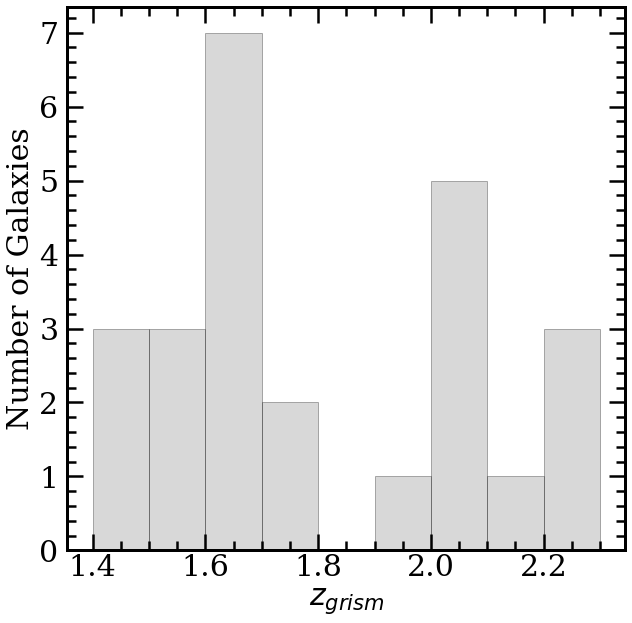

In [14]:
zbins = np.linspace(1.4, 2.3, 10)
plt.figure(figsize=(10,10))
plt.hist(nev_inspected['z_50'], bins=zbins, alpha=.3, color='gray', ec='black')
plt.xlabel(r'$z_{grism}$')
plt.ylabel('Number of Galaxies')
plt.savefig(FIGURES+'zhist.png')

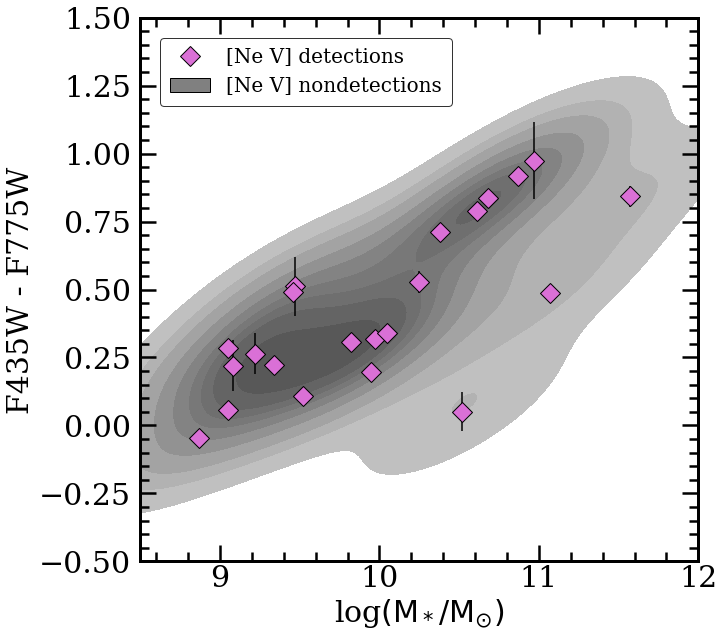

In [15]:
fig = plt.figure(figsize = (10, 10))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[0:10, 0:10])
ax0.errorbar(nev_merged['td_lmass'], nev_merged['F435W_F775W'], yerr=nev_merged['F435W_F775W_ERR'], c='k', ls='None', zorder=-1)
ax0.scatter(nev_merged['td_lmass'], nev_merged['F435W_F775W'],
            s = 200 , c = 'orchid', ec='black', marker='D', label='[Ne V] detections')
sns.kdeplot(x=nev_merged['td_lmass'], y=nev_merged['F435W_F775W'], color='gray', shade='True', zorder=-5, ax=ax0)
ax0.axis([8.5 , 12  ,  -.5 , 1.5])
ax0.set_ylabel("F435W - F775W")
ax0.set_xlabel(r"log$(\rm{M}_*/\rm{M}_{\odot})$")
legend_elements1 = [Line2D([0], [0], marker='D', color='none', label='[Ne V] detections', markerfacecolor='orchid', markeredgecolor='black', markersize=np.sqrt(200)),
                    Patch(facecolor='gray', edgecolor='k', label='[Ne V] nondetections') 
                    ]           

ax0.legend(handles=legend_elements1, loc='upper left')
plt.savefig(FIGURES+'colormass.png')

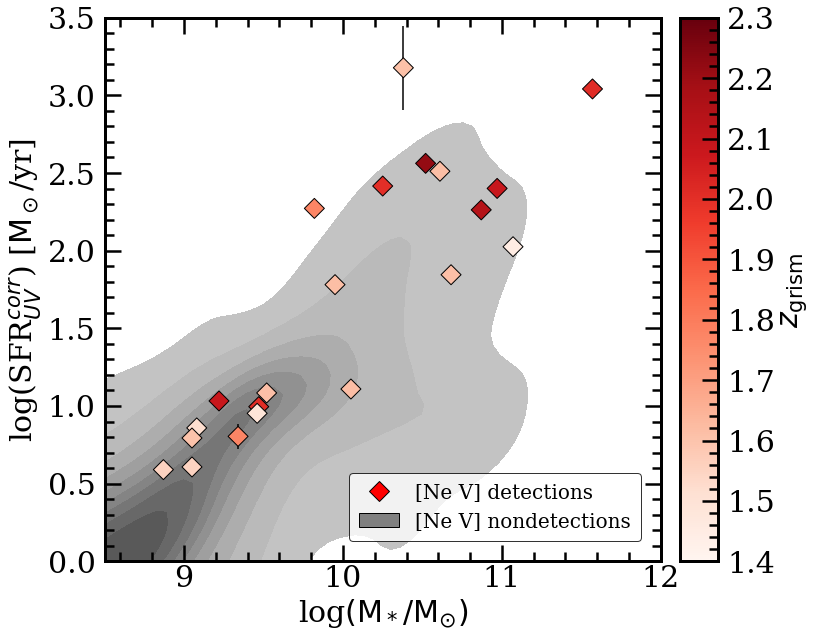

In [16]:
fig = plt.figure(figsize = (11, 10))
gs = GridSpec(nrows=10, ncols=11)
gs.update(wspace = 0.5, hspace = 0.5)

ax0 = fig.add_subplot(gs[0:10, 0:10])
ax0.errorbar(nev_merged['td_lmass'][nev_merged['ir_SFR-UV_corr'] !=0], 
                 np.log10(nev_merged['ir_SFR-UV_corr'][nev_merged['ir_SFR-UV_corr'] != 0]), 
                 yerr=nf.log_uncertainty(nev_merged['ir_SFR-UV_corr'][nev_merged['ir_SFR-UV_corr'] != 0], nev_merged['ir_SFR-UV_corr_Error'][nev_merged['ir_SFR-UV_corr'] != 0]), 
                 ls='None', c='k', zorder=-1)
y0 = ax0.scatter(nev_merged['td_lmass'][nev_merged['ir_SFR-UV_corr'] !=0], 
                 np.log10(nev_merged['ir_SFR-UV_corr'][nev_merged['ir_SFR-UV_corr'] != 0]), 
                 s=200, c=nev_merged['z_50'][nev_merged['ir_SFR-UV_corr'] !=0], ec='k', cmap='Reds', vmin=1.4, vmax=2.3,
                 marker='D', label='[Ne V] detections')
sns.kdeplot(x=barronevdf['td_lmass'][barronevdf['ir_SFR-UV_corr'] > 0], y=np.log10(barronevdf['ir_SFR-UV_corr'][barronevdf['ir_SFR-UV_corr'] > 0]), color='gray', shade='True', zorder=-5, ax=ax0)
ax0.axis([8.5 , 12  ,  0 , 3.5])
ax0.set_ylabel(r"log(SFR$_{UV}^{corr}$) [$\rm{M}_\odot$/yr]")
ax0.set_xlabel(r"log$(\rm{M}_*/\rm{M}_{\odot})$")

legend_elements1 = [Line2D([0], [0], marker='D', color='none', label='[Ne V] detections', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(200)),
                    Patch(facecolor='gray', edgecolor='k', label='[Ne V] nondetections') 
                    ]           

ax0.legend(handles=legend_elements1, loc='lower right')


ax1 = fig.add_subplot(gs[0:10,10:11])
fig.colorbar(y0,ax1,use_gridspec=True ,  label = r'$z_{\rm{grism}}$')

plt.savefig(FIGURES+'sfr_uv_mstar_cc_z.png')

/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


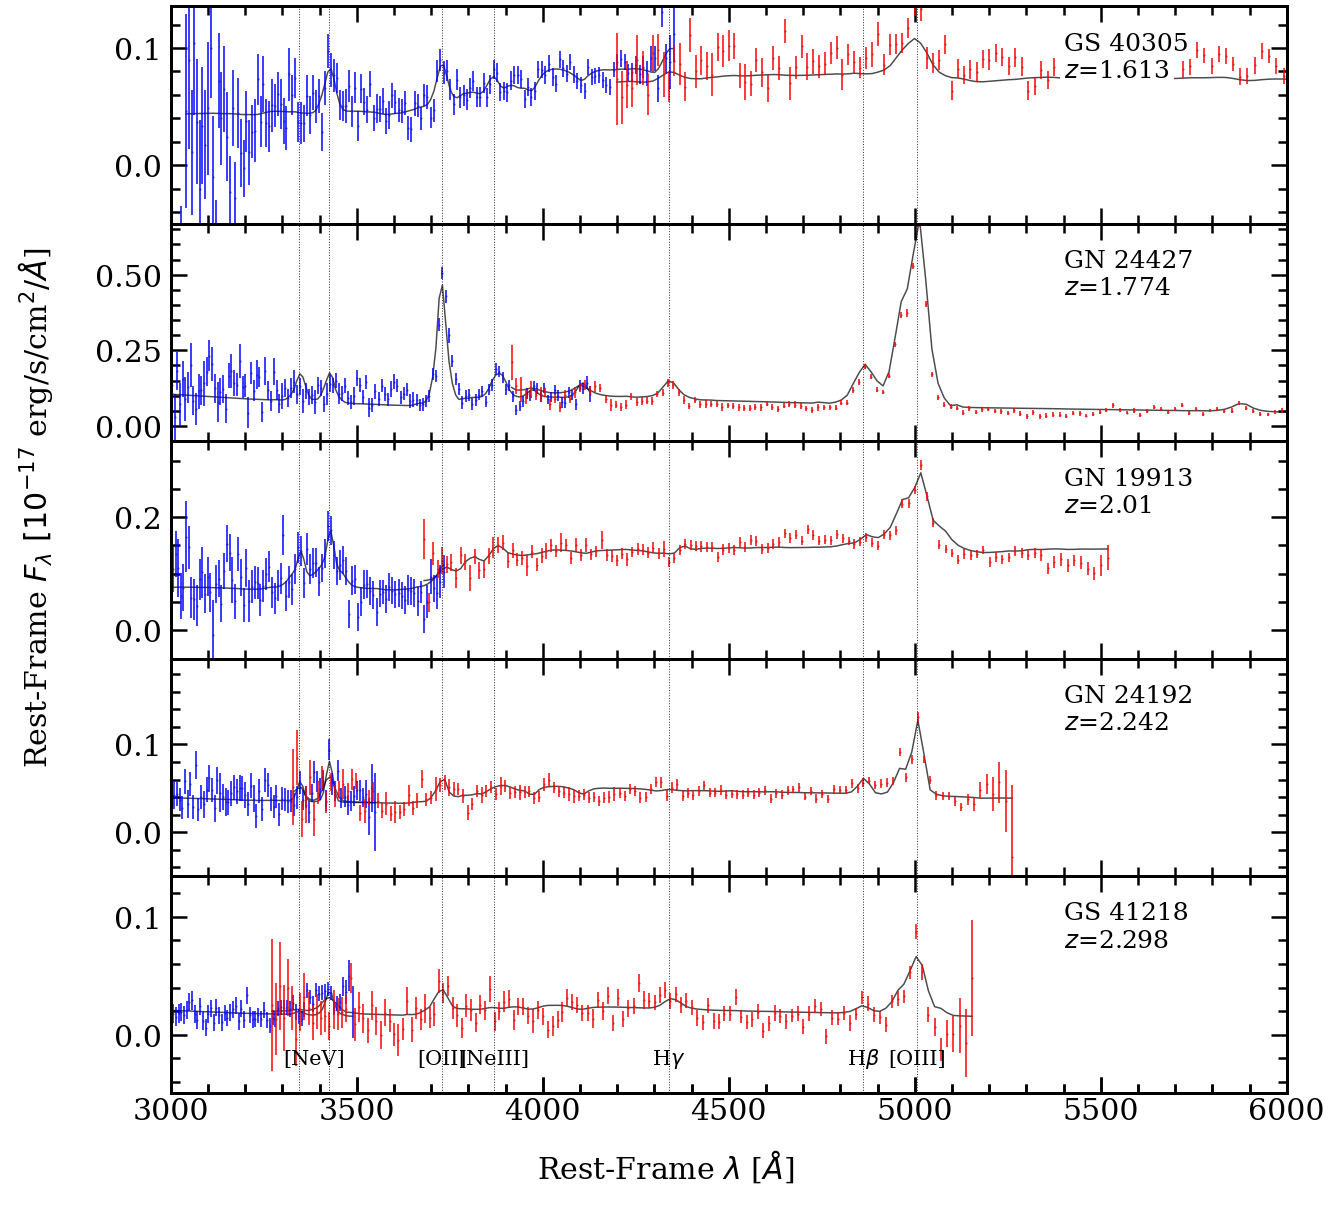

In [22]:
prettyid = [19913, 24192, 40305, 47348, 24192, 41218, 24427]
pretty = nev_inspected[nev_inspected.ID.isin(prettyid)]
pretty.sort_values(by=['z_50'], inplace=True)
pretty.reset_index(inplace=True)
 
# SPECTRA_DATA = NEV_DATA+'spectra_data/'
# for i in range(len(nev_inspected)):
#     filepath_1d = glob(SPECTRA_DATA+'1D/'+str(nev_inspected.at[i , 'FIELD_y'])+'*_1Dspec/'+str(nev_inspected.at[i , 'FIELD_y'])+'*_'+str(nev_inspected.at[i , 'ID'])+'.1D.fits')[0]
#     filepath_full = glob(SPECTRA_DATA+'full/'+str(nev_inspected.at[i , 'FIELD_y'])+'*/'+str(nev_inspected.at[i , 'FIELD_y'])+'*_'+str(nev_inspected.at[i , 'ID'])+'.full.fits')[0]
#     shutil.copy(filepath_1d, SPEC_FIG_DATA)
#     shutil.copy(filepath_full, SPEC_FIG_DATA)

fig = plt.figure(figsize = (20 , 20))
gs = GridSpec(nrows=5, ncols=5)
gs.update(wspace = 0, hspace = 0)

for i in range(len(pretty)):
    with fits.open(glob(SPEC_FIG_DATA+str(pretty.at[i , 'FIELD_y'])+'*_'+str(pretty.at[i , 'ID'])+'.1D.fits')[0]) as grism1D:
        g102 = pd.DataFrame(grism1D['G102'].data)
        g141 = pd.DataFrame(grism1D['G141'].data)
        g102_141 = g102.append(g141)
        g102_141 = g102_141[g102_141.flux > 0]
        ymin = min(g102_141['flux'] / g102_141['flat']/1e-17)*0.8
        ymax = max(g102_141['flux'] / g102_141['flat']/1e-17)
        z = pretty.at[i, 'z_50']
        g102['wave'] = g102['wave']/(1+z)
        g141['wave'] = g141['wave']/(1+z)

    with fits.open(glob(SPEC_FIG_DATA+str(pretty.at[i , 'FIELD_y'])+'*_'+str(pretty.at[i , 'ID'])+'.full.fits')[0]) as hdu:
        pscalen = hdu[1].header['PSCALEN']
        
        try :
            pscale =[]
            for n in range(pscalen+1):
                pscale.append(hdu[1].header['PSCALE{}'.format(n)] )
            pscale102 = nf.compute_scale_array(pscale, g102['wave'])
            g102['line'] = g102['line'] * pscale102

            if np.ndim(g141) == 1 :  # this should be =0 if no t141
                pscale141 = nf.compute_scale_array(pscale, g141['wave'])
                g141['line'] = g141['line'] * pscale141
        except KeyError :
            "KeyError: PSCALEN not found -- skipping APPLY_SCALE"
            
    ax = fig.add_subplot(gs[i:i+1, 0:5])
    ax.annotate(str(pretty.at[i , 'FIELD_y'])+' '+str(pretty.at[i , 'ID']), xy=(0.8,0.8), xycoords='axes fraction', backgroundcolor='white', fontsize='small')
    ax.annotate('$z$='+str(pretty.at[i , 'z_50'].round(3)), xy=(0.8,0.675), xycoords='axes fraction', backgroundcolor='white', fontsize='small')
    ax.plot(g102['wave'] , g102['line']/g102['flat']/1e-17, c = 'black', zorder=-1, alpha=0.7)
    ax.plot(g141['wave'] , g141['line']/g141['flat']/1e-17, c = 'black', zorder=-1, alpha=0.7)
    ax.scatter(g102['wave'] , g102['flux']/g102['flat']/1e-17 , s = 1.5, c = 'gray')
    ax.scatter(g141['wave'] , g141['flux']/g141['flat']/1e-17 , s = 1.5, c = 'gray')
    ax.errorbar(g102['wave'], g102['flux']/g102['flat']/1e-17,yerr=g102['err']/g102['flat']/1e-17, linestyle="None", c = 'blue')
    ax.errorbar(g141['wave'], g141['flux']/g141['flat']/1e-17,yerr=g141['err']/g141['flat']/1e-17, linestyle="None", c = 'red')

    ax.axvline(3346, color='black', lw=1, alpha=0.8, ls=':')
    ax.axvline(3426, color='black', lw=1, alpha=0.8, ls=':')
    ax.axvline(3728, color='black', lw=1, alpha=0.8, ls=':')
    ax.axvline(3869, color='black', lw=1, alpha=0.8, ls=':')
    ax.axvline(4340, color='black', lw=1, alpha=0.8, ls=':')
    ax.axvline(4861, color='black', lw=1, alpha=0.8, ls=':')
    ax.axvline(5007, color='black', lw=1, alpha=0.8, ls=':')

    ax.axis([3000,6000,-0.05,ymax])
    ax.tick_params(labelbottom=False)
    
# plt.annotate(text=r'[NeV]', xy=(3386, -0.05), xycoords='axes fraction', fontsize='x-small')
plt.annotate(text=r'[NeV]', xy=(3386, -0.025), fontsize='x-small', ha='center')
plt.annotate(text=r'[OII]', xy=(3728, -0.025), fontsize='x-small', ha='center')
plt.annotate(text=r'[NeIII]', xy=(3869, -0.025), fontsize='x-small', ha='center')
plt.annotate(text=r'[OIII]', xy=(5007, -0.025), fontsize='x-small', ha='center')
plt.annotate(text=r'H$\beta$', xy=(4861, -0.025), fontsize='x-small', ha='center')
plt.annotate(text=r'H$\gamma$', xy=(4340, -0.025), fontsize='x-small', ha='center')

ax.secondary_xaxis('bottom')
plt.annotate("Rest-Frame $\lambda$ [$\AA$]", va='center', ha='center', xy=(0.5,0.05), xycoords='subfigure fraction')
plt.annotate("Rest-Frame $F_\lambda~[10^{-17}$ erg/s/cm$^2/\AA$]", va='center', ha='center' , xy=(0.025,0.5), xycoords='figure fraction', rotation=90)
plt.savefig(FIGURES+'spec_1D.png')

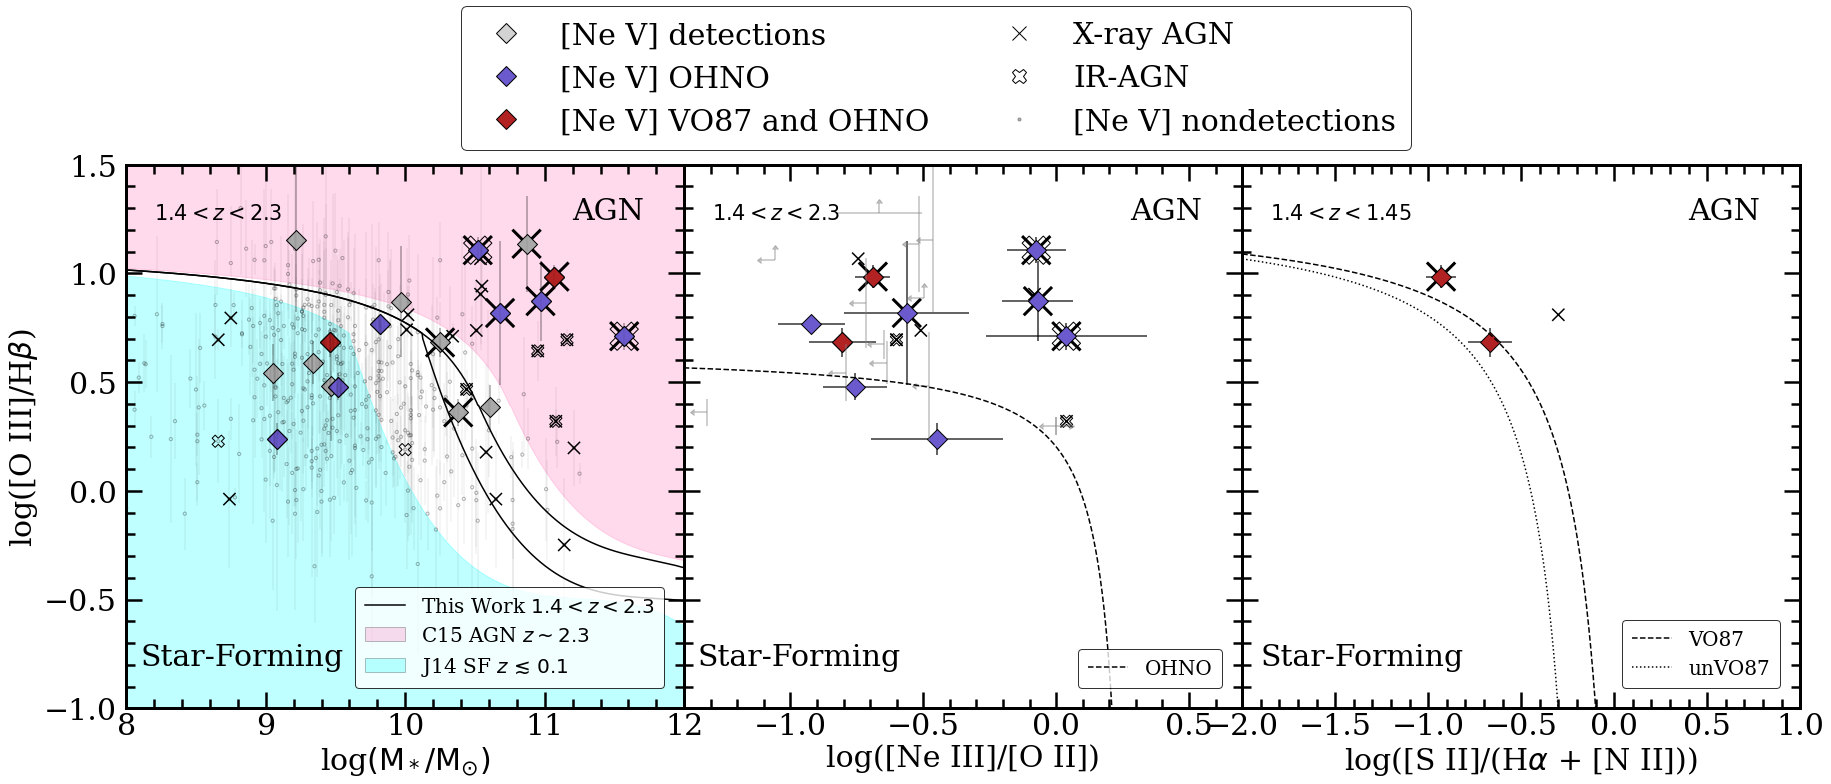

In [18]:
conditions_clear_x_vo = (clear_x_znev_merged['OIII_SNR']>1)&(clear_x_znev_merged['Hb_SNR'] > 1)&(clear_x_znev_merged['SII_SNR'] > 1)&(clear_x_znev_merged['Ha_SNR'] > 1)
conditions_clear_x_ohno = (clear_x_znev_merged['OIII_SNR']>1)&(clear_x_znev_merged['Hb_SNR'] > 1)&(clear_x_znev_merged['OII_SNR'] > 1)&(clear_x_znev_merged['NeIII-3867_SNR'] > 1)
conditions_clear_x_mex = (clear_x_znev_merged['OIII_SNR']>1)&(clear_x_znev_merged['Hb_SNR'] > 1)
conditions_clear_mex = (clear_mex['OIII_SNR']>1)&(clear_mex['Hb_SNR'] > 1)

lines_all = nev_inspected[(nev_inspected['NeIII-3867_SNR']>1)&(nev_inspected['OII_SNR']>1)&(nev_inspected['Hb_SNR']>1)]
lines_none = nev_inspected[(nev_inspected['NeIII-3867_SNR']<=1)&(nev_inspected['OII_SNR']<=1)&(nev_inspected['Hb_SNR']<=1)]
lines_hb = nev_inspected[(nev_inspected['NeIII-3867_SNR']<=1)&(nev_inspected['OII_SNR']<=1)&(nev_inspected['Hb_SNR']>1)]
lines_hb_neiii = nev_inspected[(nev_inspected['NeIII-3867_SNR']>1)&(nev_inspected['OII_SNR']<=1)&(nev_inspected['Hb_SNR']>1)]
lines_hb_oii = nev_inspected[(nev_inspected['NeIII-3867_SNR']<=1)&(nev_inspected['OII_SNR']>1)&(nev_inspected['Hb_SNR']>1)]
lines_neiii_oii = nev_inspected[(nev_inspected['NeIII-3867_SNR']>1)&(nev_inspected['OII_SNR']>1)&(nev_inspected['Hb_SNR']<=1)]
lines_oii = nev_inspected[(nev_inspected['NeIII-3867_SNR']<=1)&(nev_inspected['OII_SNR']>1)&(nev_inspected['Hb_SNR']<=1)]
lines_neiii = nev_inspected[(nev_inspected['NeIII-3867_SNR']>1)&(nev_inspected['OII_SNR']<=1)&(nev_inspected['Hb_SNR']<=1)]

fig = plt.figure(figsize = (30, 10))
gs = GridSpec(nrows=10, ncols=30)
gs.update(wspace = 0, hspace = 0.5)

x = np.linspace(7,12,1000)
y_up, y_low = nf.mass_excitation_j14(x)
ax2 = fig.add_subplot(gs[0:10, 0:10])
# mex nev
ax2.fill_between(x, y_low, -1, alpha=0.25, zorder=-5, ec='k', color='aqua')
ax2.fill_between(x+0.75, y_up, 1.5, alpha=0.25, zorder=-5, ec='k', color='hotpink')

ax2.scatter(o3hbdf['td_lmass'], np.log10(o3hbdf['OIII_Hb']),
            s=200, c='darkgrey', ec='black', marker='D')
ax2.errorbar(o3hbdf['td_lmass'], np.log10(o3hbdf['OIII_Hb']), 
             yerr=nf.log_uncertainty(o3hbdf['OIII_Hb'], o3hbdf['OIII_Hb_ERR']),
             c='black', ls='None', zorder=-1, alpha=0.3)

# mex clear
ax2.errorbar(clear_mex['td_lmass'][(clear_mex['OIII_Hb']!=1)], 
            np.log10(clear_mex['OIII_Hb'][(clear_mex['OIII_Hb']!=1)]),
            yerr=nf.log_uncertainty(clear_mex['OIII_Hb'], clear_mex['OIII_Hb_ERR']),
            c='k', ls='None', alpha=0.05)
ax2.scatter(clear_mex['td_lmass'][conditions_clear_mex], 
            np.log10(clear_mex['OIII_Hb'][conditions_clear_mex]),
            s=10, c='None', ec='black', alpha=0.3, zorder=-2)

# nev xray
ax2.scatter(nev_x['td_lmass'][(nev_x['OIII_Hb']!=1)], 
            np.log10(nev_x['OIII_Hb'][(nev_x['OIII_Hb']!=1)]),
            s=800, c='None', ec='black', marker='x', lw=3, zorder=-1)

ax2.scatter(o3hbdf['td_lmass'][o3hbdf.IRAC_AGN == 1], np.log10(o3hbdf['OIII_Hb'][o3hbdf.IRAC_AGN == 1]),
            s=800, c='None', ec='black', marker='X')
# clear xray
ax2.scatter(clear_x_znev_merged['td_lmass'][conditions_clear_x_mex&(clear_x_znev_merged['Type']=='AGN')], 
            np.log10(clear_x_znev_merged['OIII_Hb'][conditions_clear_x_mex&(clear_x_znev_merged['Type']=='AGN')]),
            marker='x', s=150, c='None', ec='black', zorder=-2)

ax2.scatter(clear_mex['td_lmass'][conditions_clear_mex&(clear_mex.IRAC_AGN == 1)], 
            np.log10(clear_mex['OIII_Hb'][conditions_clear_mex&(clear_mex.IRAC_AGN == 1)]),
            s=150, c='None', ec='black', alpha=1, marker='X')

ax2.scatter(ohnodf['td_lmass'], np.log10(ohnodf['OIII_Hb']),
            s=200, c='slateblue', ec='black', marker='D')

ax2.scatter(ohno_vo_merged['td_lmass_x'], np.log10(ohno_vo_merged['OIII_Hb_x']), 
            s=200, c='firebrick', ec='black', marker='D')

# ax2.plot(x, y_up, 'k', ls=":", label='Juneau et al. 2014')
# ax2.plot(x, y_low, 'k', ls=":")
# ax2.plot(x+0.75, y_up, 'k', ls="-.", label='Coil et al. 2015')
# ax2.plot(x+0.75, y_low, 'k', ls="-.")
ax2.plot(x+(1+nev_inspected['z_50'].median())*0.2, y_up, 'k', )
ax2.plot(x+(1+nev_inspected['z_50'].median())*0.2, y_low, 'k')
ax2.axis([8,12,-1,1.5])
ax2.set_ylabel(r"log([O III]/H$\beta$)")
ax2.set_xlabel(r"log$(\rm{M}_*/\rm{M}_{\odot})$")
legend_elements2 = [Line2D([0], [0], color='k', label='This Work $1.4<z<2.3$'),
                    Patch(facecolor='hotpink', edgecolor='k',alpha=0.25, label=r'C15 AGN $z\sim2.3$'),
                    Patch(facecolor='aqua', edgecolor='k',alpha=0.25, label=r'J14 SF $z~ \lesssim~ 0.1$')]
ax2.legend(handles=legend_elements2, loc='lower right')
ax2.annotate('Star-Forming', (8.1, -0.8))
ax2.annotate('AGN', xy=(0.8,0.9), xycoords='axes fraction')
ax2.annotate('$1.4<z<2.3$', xy=(0.05,0.9), xycoords='axes fraction', fontsize='x-small')

x = np.linspace(-2,0.285, 1000)
ax1 = fig.add_subplot(gs[0:10, 10:20])
# ax1.errorbar(np.log10(ohnocleardf['NeIII_OII']), np.log10(ohnocleardf['OIII_Hb']), 
#              yerr=nf.log_uncertainty(ohnocleardf['OIII_Hb'], ohnocleardf['OIII_Hb_ERR']), 
#              xerr=nf.log_uncertainty(ohnocleardf['NeIII_OII'], ohnocleardf['NeIII_OII_ERR']),
#              c='black', alpha=0.05, ls='None', zorder=-1)
# ax1.scatter(np.log10(ohnocleardf['NeIII_OII']), np.log10(ohnocleardf['OIII_Hb']),
#             s=10, c='None', ec='black', alpha=0.3)
# ax1.scatter(np.log10(ohnocleardf['NeIII_OII']), np.log10(ohnocleardf['OIII_Hb']),
#             s=10, c='None', ec='black', alpha=0.3)
ax1.scatter(np.log10(clear_x_znev_merged['NeIII_OII'][conditions_clear_x_ohno&(clear_x_znev_merged['Type']=='AGN')]), 
            np.log10(clear_x_znev_merged['OIII_Hb'][conditions_clear_x_ohno&(clear_x_znev_merged['Type']=='AGN')]),
            marker='x', s=150 , c='None', ec='black', zorder=-2)
ax1.scatter(np.log10(ohnoclearbarro['NeIII_OII'][(ohnoclearbarro.IRAC_AGN == 1)]), 
            np.log10(ohnoclearbarro['OIII_Hb'][(ohnoclearbarro.IRAC_AGN == 1)]),
            s=150, c='None', ec='black', alpha=1, marker='X')
ax1.scatter(np.log10(ohnobarro['NeIII_OII'][ohnobarro.IRAC_AGN_y == 1]), 
            np.log10(ohnobarro['OIII_Hb'][ohnobarro.IRAC_AGN_y == 1]),
            s=800, c='None', ec='black', marker='X')
ax1.errorbar(np.log10(ohnodf['NeIII_OII']), np.log10(ohnodf['OIII_Hb']), 
             yerr=nf.log_uncertainty(ohnodf['OIII_Hb'], ohnodf['OIII_Hb_ERR']), 
             xerr=nf.log_uncertainty(ohnodf['NeIII_OII'], ohnodf['NeIII_OII_ERR']),
             alpha=0.8, c='black', ls='None', zorder=-1)
ax1.scatter(np.log10(ohnodf['NeIII_OII']), np.log10(ohnodf['OIII_Hb']),
            s=200, c='slateblue', ec='black', marker='D')
ax1.scatter(np.log10(nev_x['NeIII_OII'][(nev_x['OIII_Hb']!=1)&(nev_x['NeIII_OII']>0)&(nev_x['NeIII_OII']!=1)]), 
            np.log10(nev_x['OIII_Hb'][(nev_x['OIII_Hb']!=1)&(nev_x['NeIII_OII']>0)&(nev_x['NeIII_OII']!=1)]),
            s=800, c='None', ec='black', marker='x', lw=3, zorder=-1)
ax1.scatter(np.log10(ohno_vo_merged['NeIII_OII_x']), np.log10(ohno_vo_merged['OIII_Hb_x']), 
            s=200, c='firebrick', ec='black', marker='D')

ax1.errorbar(np.log10(np.full(len(lines_none),7*10**-1)/np.full(len(lines_none),7*10**-1)), np.log10(lines_none['OIII_FLUX']/np.full(len(lines_none),7*10**-1)),
            xerr=[np.full(len(lines_none), 0.05),np.full(len(lines_none), 0.05)], yerr=[np.zeros(len(lines_none)),np.full(len(lines_none), 0.05)], 
            xlolims=True, lolims=True, c='gray', alpha=0.5)
ax1.errorbar(np.log10(np.full(len(lines_none),7*10**-1)/np.full(len(lines_none),7*10**-1)), np.log10(lines_none['OIII_FLUX']/np.full(len(lines_none),7*10**-1)),
            xerr=[np.full(len(lines_none), 0.05),np.full(len(lines_none), 0.05)], yerr=[np.zeros(len(lines_none)),np.full(len(lines_none), 0.05)], 
            xuplims=True, lolims=True, c='gray', alpha=0.5)

ax1.errorbar(np.log10(np.full(len(lines_hb),7*10**-1)/np.full(len(lines_hb),7*10**-1)), np.log10(lines_hb['OIII_Hb']),
            xerr=[np.full(len(lines_hb), 0.05),np.full(len(lines_hb), 0.05)], yerr=nf.log_uncertainty(lines_hb['OIII_Hb'], lines_hb['OIII_Hb_ERR']), 
            xlolims=True, c='gray', alpha=0.5, ls='None')
ax1.errorbar(np.log10(np.full(len(lines_hb),7*10**-1)/np.full(len(lines_hb),7*10**-1)), np.log10(lines_hb['OIII_Hb']),
            xerr=[np.full(len(lines_hb), 0.05),np.full(len(lines_hb), 0.05)], yerr=nf.log_uncertainty(lines_hb['OIII_Hb'], lines_hb['OIII_Hb_ERR']), 
            xuplims=True, c='gray', alpha=0.5, ls='None')

ax1.errorbar(np.log10(lines_neiii_oii['NeIII_OII']), np.log10(lines_neiii_oii['OIII_FLUX']/np.full(len(lines_neiii_oii),7*10**-1)),
            xerr=nf.log_uncertainty(lines_neiii_oii['NeIII_OII'], lines_neiii_oii['NeIII_OII_ERR']), yerr=[np.zeros(len(lines_neiii_oii)),np.full(len(lines_neiii_oii), 0.05)], 
            lolims=True, c='gray', alpha=0.5, ls='None')

ax1.errorbar(np.log10(np.full(len(lines_hb_oii),7*10**-1)/lines_hb_oii['OII_FLUX']), np.log10(lines_hb_oii['OIII_Hb']),
            xerr=[np.full(len(lines_hb_oii),0.05), np.zeros(len(lines_hb_oii))], yerr=nf.log_uncertainty(lines_hb_oii['OIII_Hb'], lines_hb_oii['OIII_Hb_ERR']), 
            xuplims=True, c='gray', alpha=0.5, ls='None')

ax1.errorbar(np.log10(np.full(len(lines_oii),7*10**-1)/lines_oii['OII_FLUX']), np.log10(lines_oii['OIII_FLUX']/np.full(len(lines_oii),7*10**-1)),
            xerr=[np.full(len(lines_oii),0.05), np.zeros(len(lines_oii))], yerr=[np.zeros(len(lines_oii)), np.full(len(lines_oii),0.05)], 
            xuplims=True, lolims=True, c='gray', alpha=0.5, ls='None')

ax1.plot(x, nf.ohno(x), c='black', ls='--', label= 'OHNO')
ax1.axis([-1.4, 0.7,-1, 1.5])
# ax1.axis([-1.4, 2,-1, 5])
ax1.set_xlabel(r"log([Ne III]/[O II])")
ax1.legend(loc='lower right')
ax1.annotate('Star-Forming', (-1.35, -0.8))
ax1.annotate('AGN', xy=(0.8,0.9), xycoords='axes fraction')
ax1.annotate('$1.4<z<2.3$', xy=(0.05,0.9), xycoords='axes fraction', fontsize='x-small')
ax1.tick_params(labelleft = False)

x = np.linspace(-2,0.09, 1000)
xun = np.linspace(-2,-0.12, 1000)

ax0 = fig.add_subplot(gs[0:10, 20:30])
# ax0.errorbar(np.log10(vo87cleardf['SII_Ha']), np.log10(vo87cleardf['OIII_Hb']), 
#              yerr=nf.log_uncertainty(vo87cleardf['OIII_Hb'], vo87cleardf['OIII_Hb_ERR']), 
#              xerr=nf.log_uncertainty(vo87cleardf['SII_Ha'], vo87cleardf['SII_Ha_ERR']),
#              c='black', alpha=0.05, ls='None', zorder=-1)
# ax0.scatter(np.log10(vo87cleardf['SII_Ha']), np.log10(vo87cleardf['OIII_Hb']), 
#             s=10, c='None', ec='black', alpha=0.3)
# ax0.scatter(np.log10(vo87cleardf['SII_Ha'][vo87cleardf.IRAC_AGN == 1]), np.log10(vo87cleardf['OIII_Hb'][vo87cleardf.IRAC_AGN == 1]), 
#             s=150, c='None', ec='black', alpha=1, marker='X')
ax0.errorbar(np.log10(vo87df['SII_Ha']), np.log10(vo87df['OIII_Hb']), 
             yerr=nf.log_uncertainty(vo87df['OIII_Hb'], vo87df['OIII_Hb_ERR']), 
             xerr=nf.log_uncertainty(vo87df['SII_Ha'], vo87df['SII_Ha_ERR']),
             c='black', ls='None', zorder=-1, alpha=0.8)
ax0.scatter(np.log10(nev_x['SII_Ha'][(nev_x['OIII_Hb']!=1)&(nev_x['SII_Ha']!=1)&(nev_x['SII_Ha']>0)]), 
            np.log10(nev_x['OIII_Hb'][(nev_x['OIII_Hb']!=1)&(nev_x['SII_Ha']!=1)&(nev_x['SII_Ha']>0)]),
            s=800, c='None', ec='black', lw=3, marker='x', zorder=-1)
ax0.scatter(np.log10(clear_x_znev_merged['SII_Ha'][conditions_clear_x_vo&(clear_x_znev_merged['Type']=='AGN')]), 
            np.log10(clear_x_znev_merged['OIII_Hb'][conditions_clear_x_vo&(clear_x_znev_merged['Type']=='AGN')]),
            marker='x', s=150 , c='None', ec='black', zorder=-2)
ax0.scatter(np.log10(vo87clearbarro['NeIII_OII'][(vo87clearbarro.IRAC_AGN == 1)]), 
            np.log10(vo87clearbarro['OIII_Hb'][(vo87clearbarro.IRAC_AGN == 1)]),
            s=150, c='None', ec='black', alpha=1, marker='X')
ax0.scatter(np.log10(ohno_vo_merged['SII_Ha_x']), np.log10(ohno_vo_merged['OIII_Hb_x']), 
            s=200, c='firebrick', ec='black', marker='D')
ax0.plot(x, nf.vo87(x), c='black', ls='--', label='VO87')
ax0.plot(xun, nf.unvo87(xun), c='black', ls=':', label='unVO87')
ax0.axis([-2, 1,-1, 1.5])

ax0.set_xlabel(r"log([S II]/(H$\alpha$ + [N II]))")
ax0.tick_params(labelleft = False)

ax0.annotate('Star-Forming', (-1.9, -0.8))
ax0.annotate('AGN', xy=(0.8,0.9), xycoords='axes fraction')
ax0.annotate('$1.4<z<1.45$', xy=(0.05,0.9), xycoords='axes fraction',  fontsize='x-small')
ax0.legend(loc='lower right')

legend_elements = [Line2D([0], [0], marker='D', color='none', label='[Ne V] detections', markerfacecolor='lightgrey', markeredgecolor='black', markersize=np.sqrt(200)),
                    # Line2D([0], [0], marker='D', color='none', label='[NeV] VO87', markerfacecolor='mediumslateblue', markeredgecolor='black', markersize=np.sqrt(200)),
                    Line2D([0], [0], marker='D', color='none', label='[Ne V] OHNO', markerfacecolor='slateblue', markeredgecolor='black', markersize=np.sqrt(200)),
                    Line2D([0], [0], marker='D', color='none', label='[Ne V] VO87 and OHNO', markerfacecolor='firebrick', markeredgecolor='black', markersize=np.sqrt(200)),
                    Line2D([0], [0], marker='x', color='none', label='X-ray AGN', markerfacecolor='black', markersize=np.sqrt(200)),
                    Line2D([0], [0], marker='X', color='none', label='IR-AGN', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(200)),
                    Line2D([0], [0], marker='o', color='none', label='[Ne V] nondetections', markerfacecolor='black', markeredgecolor='black', alpha=0.3, markersize=np.sqrt(10))]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5,1), loc='center', facecolor='white', ncol=2, fontsize='medium')

plt.savefig(FIGURES+'o3hb_classifiers_ohnolimits.png')

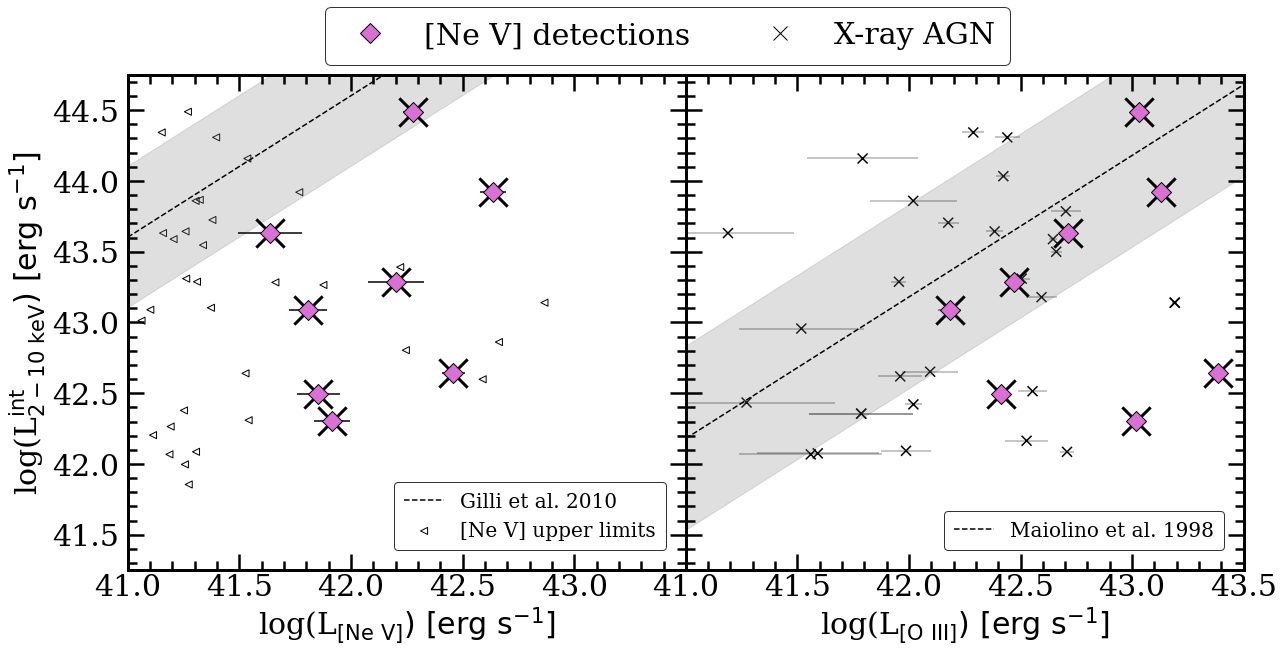

In [19]:
uplims_nev_x = nf.luminosity(np.array(clear_x_znev['z_50'][(clear_x_znev['NeV-3426_FLUX_ERR']>0)&(clear_x_znev_merged['Type']=='AGN')]), 
                             np.array(clear_x_znev['NeV-3426_FLUX_ERR'][(clear_x_znev['NeV-3426_FLUX_ERR']>0)&(clear_x_znev_merged['Type']=='AGN')])).value

conditions_clear_x = (clear_x_znev_merged['OIII_SNR']>1)&(clear_x_znev_merged['Type']=='AGN')

fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.errorbar(x=nev_x['logL_3426'], 
            y=np.log10(nev_x['LXc']), 
            xerr=nev_x['logL_3426_ERR'],
            ls='None', c='black', zorder=-1)
ax0.scatter(nev_x['logL_3426'], 
            np.log10(nev_x['LXc']), 
            s=200, c='orchid', ec='black', marker='D')
ax0.scatter(nev_x['logL_3426'] , np.log10(nev_x['LXc']), 
            s = 800, c='orchid' , ec='black', marker='x', lw=3, zorder=-1)
# ax0.scatter(np.log10(uplims_nev_x), 
#             np.log10(clear_x_znev['LXc'][clear_x_znev['NeV-3426_FLUX_ERR']>0]), 
#             s=100, c='none', ec='black' , marker='x', zorder=-2)
ax0.scatter(np.log10(uplims_nev_x), 
            np.log10(clear_x_znev['LXc'][(clear_x_znev['NeV-3426_FLUX_ERR']>0)&(clear_x_znev_merged['Type']=='AGN')]), 
            s=50, c='none', ec='black' , marker='<' , label = '[Ne V] upper limits', zorder=-2)

ax0.set_ylabel(r'log(L$_{2-10~\mathrm{keV}}^{\mathrm{int}})~[\mathrm{erg~s}^{-1}]$')
ax0.set_xlabel(r"log(L$_{\mathrm{[Ne~V]}})~[\mathrm{erg~s}^{-1}]$")
ax0.plot(np.linspace(41,45, 1000), np.log10((10**np.linspace(41,45, 1000))*400), c='k', ls='--', label='Gilli et al. 2010')
ax0.fill_between(np.linspace(41,45, 1000), np.log10((10**np.linspace(41,45, 1000))*(400*10**-0.5)), np.log10((10**np.linspace(41,45, 1000))*(400*10**0.5)), color='gray', alpha=0.25, zorder=-2)
# ax0.fill_between(np.linspace(41,45, 1000), np.log10((10**np.linspace(41,45, 1000))*(400*10**-0.9)), np.log10((10**np.linspace(41,45, 1000))*(400*10**0.9)), color='lightgray', alpha=0.5, zorder=-2)

# ax0.plot(np.linspace(41,45, 1000), np.log10((10**np.linspace(41,45, 1000))*(400*10**0.5)), c='k', ls='--')

ax0.axis([41,43.499,41.25,44.75])
ax0.legend(loc='lower right')

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.errorbar(x=nev_x['logL_OIII'], 
             y=np.log10(nev_x['LXc']), 
             xerr=nev_x['logL_OIII_ERR'], 
             c='k', alpha=0.3, ls='None', zorder=-1)
ax1.errorbar(x=clear_x_znev_merged['logL_OIII'][conditions_clear_x], 
             y=np.log10(clear_x_znev_merged['LXc'][conditions_clear_x]), 
             xerr=clear_x_znev_merged['logL_OIII_ERR'][conditions_clear_x], 
             c='k', alpha=0.3, ls='None', zorder=-1)
ax1.scatter(nev_x['logL_OIII'] , np.log10(nev_x['LXc']), 
            s = 800, c='orchid' , ec='black', marker='x', lw=3)
ax1.scatter(nev_x['logL_OIII'] , np.log10(nev_x['LXc']), 
            s = 200, c='orchid' , ec='black', marker='D')
ax1.scatter(clear_x_znev_merged['logL_OIII'][conditions_clear_x], 
            np.log10(clear_x_znev_merged['LXc'][conditions_clear_x]),
            marker='x', s=100, c='None', ec='black', zorder=-2)
ax1.set_xlabel(r'log(L$_{\mathrm{[O~III]}})~[\mathrm{erg~s}^{-1}]$')

ax1.plot(np.linspace(41,45, 1000), np.log10((10**np.linspace(41,45, 1000))*(10**(1.18))), c='k', ls='--', label='Maiolino et al. 1998')
ax1.fill_between(np.linspace(41,45, 1000), np.log10((10**np.linspace(41,45, 1000))*(10**(0.53))), np.log10((10**np.linspace(41,45, 1000))*(10**1.83)), color='gray', alpha=0.25, zorder=-2)

# ax1.plot([41,45],[41,45], c='k', ls='--')
ax1.axis([41,43.5,41.25,44.75])
ax1.tick_params(labelleft = False)
ax1.legend(loc='lower right')

legend_elements = [Line2D([0], [0], marker='D', color='none', label='[Ne V] detections', markerfacecolor='orchid', markeredgecolor='black', markersize=np.sqrt(200)),
                    Line2D([0], [0], marker='x', color='none', label='X-ray AGN', markerfacecolor='black', markersize=np.sqrt(200))]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5,.8), loc='center', facecolor='white', ncol=2, fontsize='medium')
plt.savefig(FIGURES+'xray_nev_oiii.png')
plt.show()

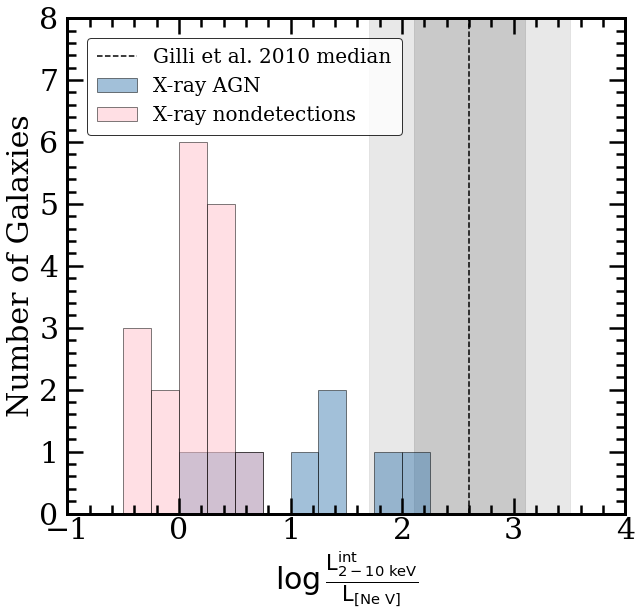

In [20]:
nev_inspected_no_x = nev_inspected[nev_inspected.ID.isin(nev_x['ID']) == False].copy()
gn_nox = nev_inspected_no_x[nev_inspected_no_x['FIELD_y'] == 'GN']
gs_nox = nev_inspected_no_x[nev_inspected_no_x['FIELD_y'] == 'GS']
x_upper_limits_n = nf.get_Lx_from_flux(log_fluxs=np.full(len(gn_nox), np.log10(5.9*10**-17)), zs=np.array(gn_nox['z_50']), gam=1.8)-np.log10(gn_nox['L_3426'])
x_upper_limits_s = nf.get_Lx_from_flux(log_fluxs=np.full(len(gs_nox), np.log10(2.7*10**-17)), zs=np.array(gs_nox['z_50']), gam=1.8)-np.log10(gs_nox['L_3426'])
x_lims = x_upper_limits_n.append(x_upper_limits_s)

xbins=[-1, -0.75,-.5,-0.25,0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5]
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
# xnevbins = [0, 10,20,30,40,50]
ax0.hist(np.log10(nev_x['LXc']/nev_x['L_3426']), bins=xbins, color='steelblue', edgecolor='k',
         label='X-ray AGN', alpha=0.5)
ax0.hist(x_lims, bins=xbins, color='pink', edgecolor='k',
         label='X-ray nondetections', alpha=0.5)

ax0.axvline(x=np.log10(400), c='k', ls='--', label='Gilli et al. 2010 median')
ax0.fill_betweenx(y=[0,30], x1=np.log10(400)-0.5, x2=np.log10(400)+0.5, color='gray', alpha=0.5, zorder=-2)
ax0.fill_betweenx(y=[0,30], x1=np.log10(400)-0.9, x2=np.log10(400)+0.9, color='lightgray', alpha=0.5, zorder=-2)
ax0.axis([-1,4,0,8])

ax0.set_xlabel(r'$\log\frac{\mathrm{L}_{2-10~\mathrm{keV}}^{\mathrm{int}}}{\mathrm{L}_{\mathrm{[Ne~V]}}}$')
ax0.set_ylabel('Number of Galaxies')
ax0.legend()

plt.savefig(FIGURES+'xnev_hist.png')

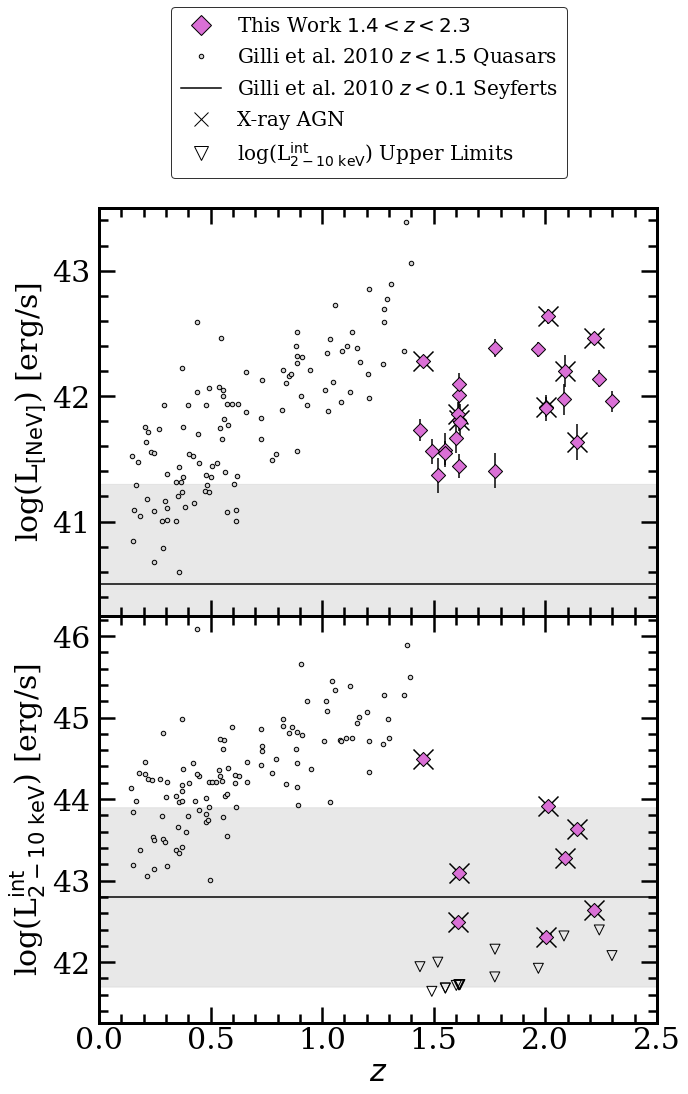

In [21]:
nev_inspected_no_x = nev_inspected[nev_inspected.ID.isin(nev_x['ID']) == False].copy()
gn_nox = nev_inspected_no_x[nev_inspected_no_x['FIELD_y'] == 'GN']
gs_nox = nev_inspected_no_x[nev_inspected_no_x['FIELD_y'] == 'GS']
x_upper_limits_n = nf.get_Lx_from_flux(log_fluxs=np.full(len(gn_nox), np.log10(5.9*10**-17)), zs=np.array(gn_nox['z_50']), gam=1.8)
x_upper_limits_s = nf.get_Lx_from_flux(log_fluxs=np.full(len(gs_nox), np.log10(2.7*10**-17)), zs=np.array(gs_nox['z_50']), gam=1.8)
x_lims = np.append(x_upper_limits_n,x_upper_limits_s)

fig = plt.figure(figsize = (10 , 18))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0)

ax0 = fig.add_subplot(gs[2:7, 0:10])
ax0.errorbar(nev_inspected['z_50'], nev_inspected['logL_3426'], xerr=nev_inspected['z_50_error'], yerr=nev_inspected['logL_3426_ERR'], color='k', ls='None', zorder=-1)
ax0.scatter(nev_x['z_50'], nev_x['logL_3426'], s = 400, c = 'orchid', ec='k' , marker='x', label='X-ray AGN')
ax0.scatter(nev_inspected['z_50'], nev_inspected['logL_3426'], s = 100, c = 'orchid', ec='k' , marker='D')
ax0.scatter(gilli_lnev_z[0], gilli_lnev_z[1], s = 20, c = 'lightgray', ec='k' , marker='o')
ax0.fill_between(np.linspace(0,2.5, 1000), 40.5-0.8, 40.5+0.8, color='lightgray', alpha=0.5, zorder=-2)

ax0.plot([0,2.5],[40.5, 40.5], c='k')
ax0.set_ylabel(r'log(L$_{\mathrm{[Ne V]}}$) [erg/s]')
ax0.axis([0,2.5,40.25,43.5])
ax0.tick_params(labelbottom = False)
# ax0.grid(alpha=0.5, zorder=-5)

ax1 = fig.add_subplot(gs[7:12, 0:10])

ax1.scatter(gn_nox['z_50'], x_upper_limits_n, 
            s = 100, c = 'None', ec='k' , marker='v', label='log(L$_{2-10~|\mathrm{keV}}^{\mathrm{int}}$) Upper Limits')
ax1.scatter(gs_nox['z_50'], x_upper_limits_s, 
            s = 100, c = 'None', ec='k' , marker='v')
ax1.scatter(nev_x['z_50'], np.log10(nev_x['LXc']), s = 400, c = 'k', ec='k' , marker='x')
ax1.scatter(nev_x['z_50'], np.log10(nev_x['LXc']), s = 100, c = 'orchid', ec='k' , marker='D')
ax1.scatter(gilli_lx_z[0], gilli_lx_z[1], s = 20, c = 'lightgray', ec='k' , marker='o')
ax1.set_ylabel(r'log(L$_{2-10~\mathrm{keV}}^{\mathrm{int}}$) [erg/s]')
ax1.set_xlabel(r'$z$')

ax1.fill_between(np.linspace(0,2.5, 1000), 42.8-1.1, 42.8+1.1, color='lightgray', alpha=0.5, zorder=-2)

ax1.plot([0,2.5],[42.8, 42.8], c='k')
ax1.axis([0,2.5,41.25,46.25])
# ax1.tick_params(labelleft = False)
# ax1.legend()
# ax1.grid(alpha=0.5, zorder=-5)

legend_elements = [Line2D([0], [0], marker='D', color='none', label='This Work $1.4<z<2.3$', markerfacecolor='orchid', markeredgecolor='black', markersize=np.sqrt(200)),
                   Line2D([0], [0], marker='o', color='none', label='Gilli et al. 2010 $z<1.5$ Quasars', markerfacecolor='lightgrey', markeredgecolor='black', markersize=np.sqrt(20)),
                   Line2D([0], [0], color='k', label='Gilli et al. 2010 $z<0.1$ Seyferts'),
                   Line2D([0], [0], marker='x', color='none', label='X-ray AGN', markerfacecolor='black', markersize=np.sqrt(200)),
                   Line2D([0], [0], marker='v', color='none', label='log(L$_{2-10~\mathrm{keV}}^{\mathrm{int}}$) Upper Limits', markerfacecolor='none', markeredgecolor='k', markersize=np.sqrt(200)),]

fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, 0.925), loc='upper center', facecolor='white')

plt.savefig(FIGURES+'x_nev_z.png')